In [45]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [46]:
df = pd.read_csv("Customer-Churn-Records.csv")

In [47]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464.0
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456.0
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377.0
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350.0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         9996 non-null   float64
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 9986 non-null   float64
 7   Tenure              10000 non-null  int64  
 8   Balance             9989 non-null   float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     9989 non-null   float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

## Thay thế các dữ liệu bị thiếu bằng giá trị trung bình 

In [49]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  
        column_mean = df[column].mean()  
        df[column].fillna(column_mean, inplace=True) 


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  float64
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  float64
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

## Loại bỏ những cột dữ liệu không cần thiết

In [51]:
df.drop(columns=["RowNumber", "CustomerId", "Surname" ], inplace=True)

## Đếm số lượng giá trị duy nhất


In [52]:
df.nunique()

CreditScore            461
Geography                3
Gender                   2
Age                     71
Tenure                  11
Balance               6372
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9989
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           786
dtype: int64

In [53]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464.0
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456.0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377.0
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350.0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425.0


## Đồ thị biểu diễn cột Exited 

Exited
0    7962
1    2038
Name: count, dtype: int64


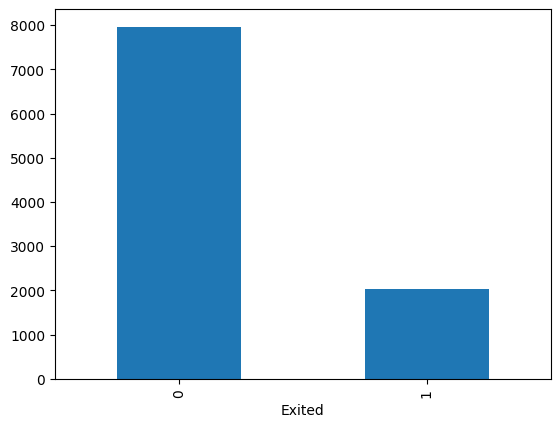

In [54]:
g = df['Exited'].value_counts()
print(g)
g.plot.bar()
plt.show()

## Đồ thị biểu diễn các giá trị rời rạc 

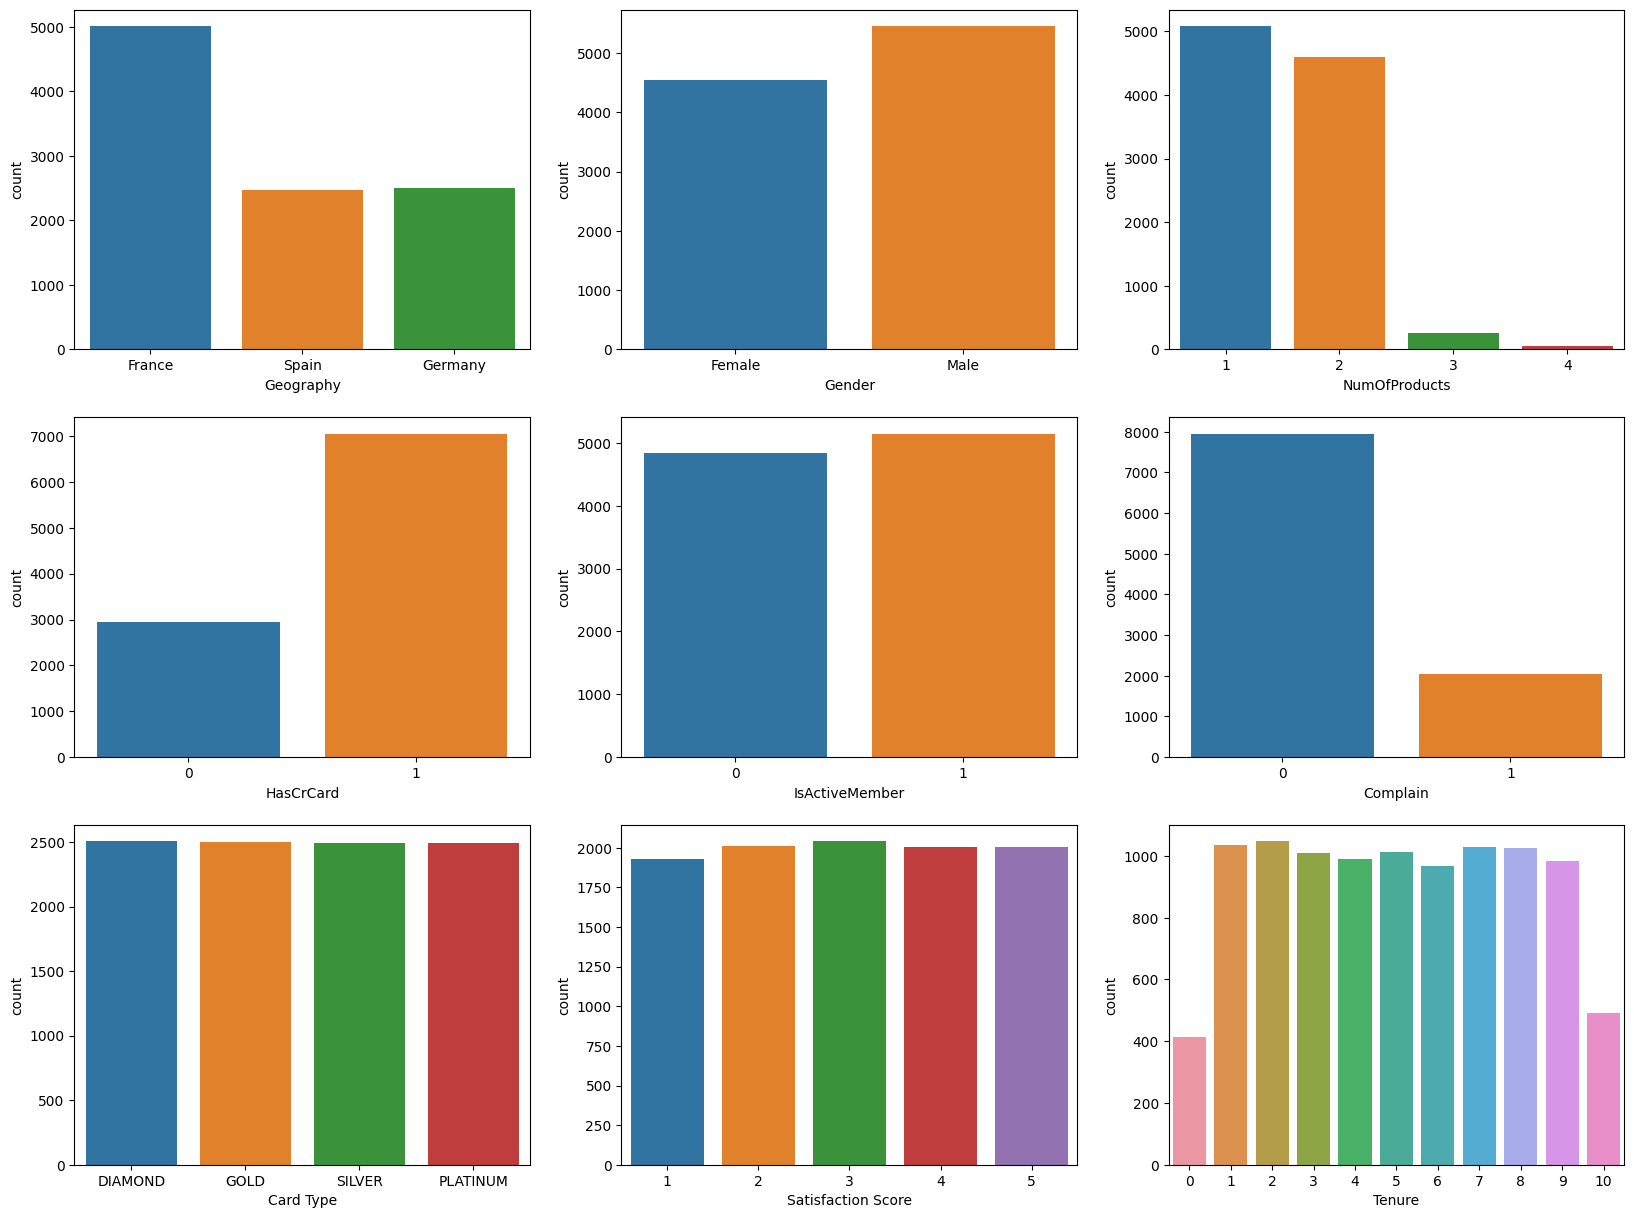

In [55]:
fig, axes = plt.subplots(3, 3, figsize = (20, 15))
sns.countplot ( ax = axes[0, 0], data = df, x = "Geography")
sns.countplot ( ax = axes[0, 1], data = df, x = "Gender")
sns.countplot ( ax = axes[0, 2], data = df, x = "NumOfProducts")
sns.countplot ( ax = axes[1, 0], data = df, x = "HasCrCard")
sns.countplot ( ax = axes[1, 1], data = df, x = "IsActiveMember")
sns.countplot ( ax = axes[1, 2], data = df, x = "Complain")
sns.countplot ( ax = axes[2, 0], data = df, x = "Card Type")
sns.countplot ( ax = axes[2, 1], data = df, x = "Satisfaction Score")
sns.countplot ( ax = axes[2, 2], data = df, x = "Tenure")
plt.show()

## Đồ thị biểu diễn các giá trị liên tục

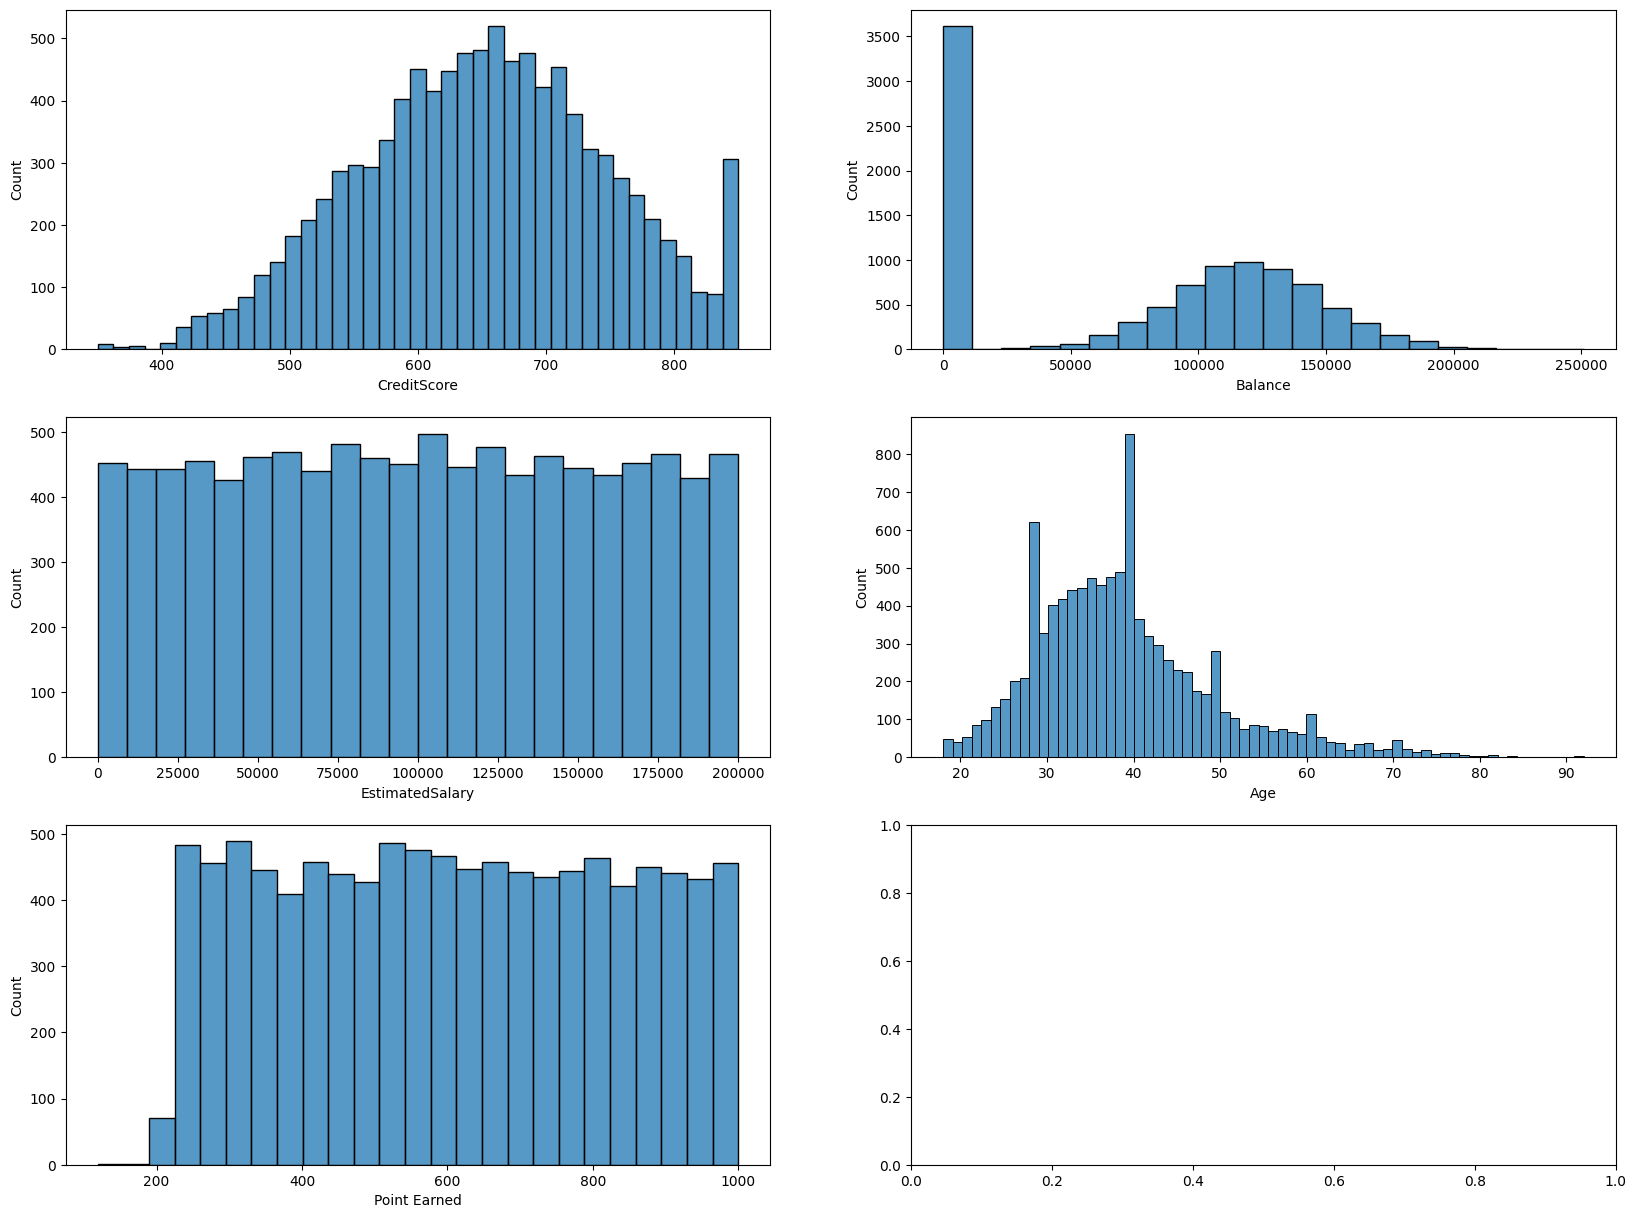

In [56]:
fig, axes = plt.subplots(3, 2, figsize = (20, 15))
sns.histplot ( ax = axes[0, 0], data = df, x = "CreditScore")
sns.histplot ( ax = axes[0, 1], data = df, x = "Balance")
sns.histplot ( ax = axes[1, 0], data = df, x = "EstimatedSalary")
sns.histplot ( ax = axes[1, 1], data = df, x = "Age")
sns.histplot ( ax = axes[2, 0], data = df, x = "Point Earned")
plt.show()

## Đồ thị biểu diễn mối liên quan giữa cột "Exit" và các cột chứa giá trị rời rạc

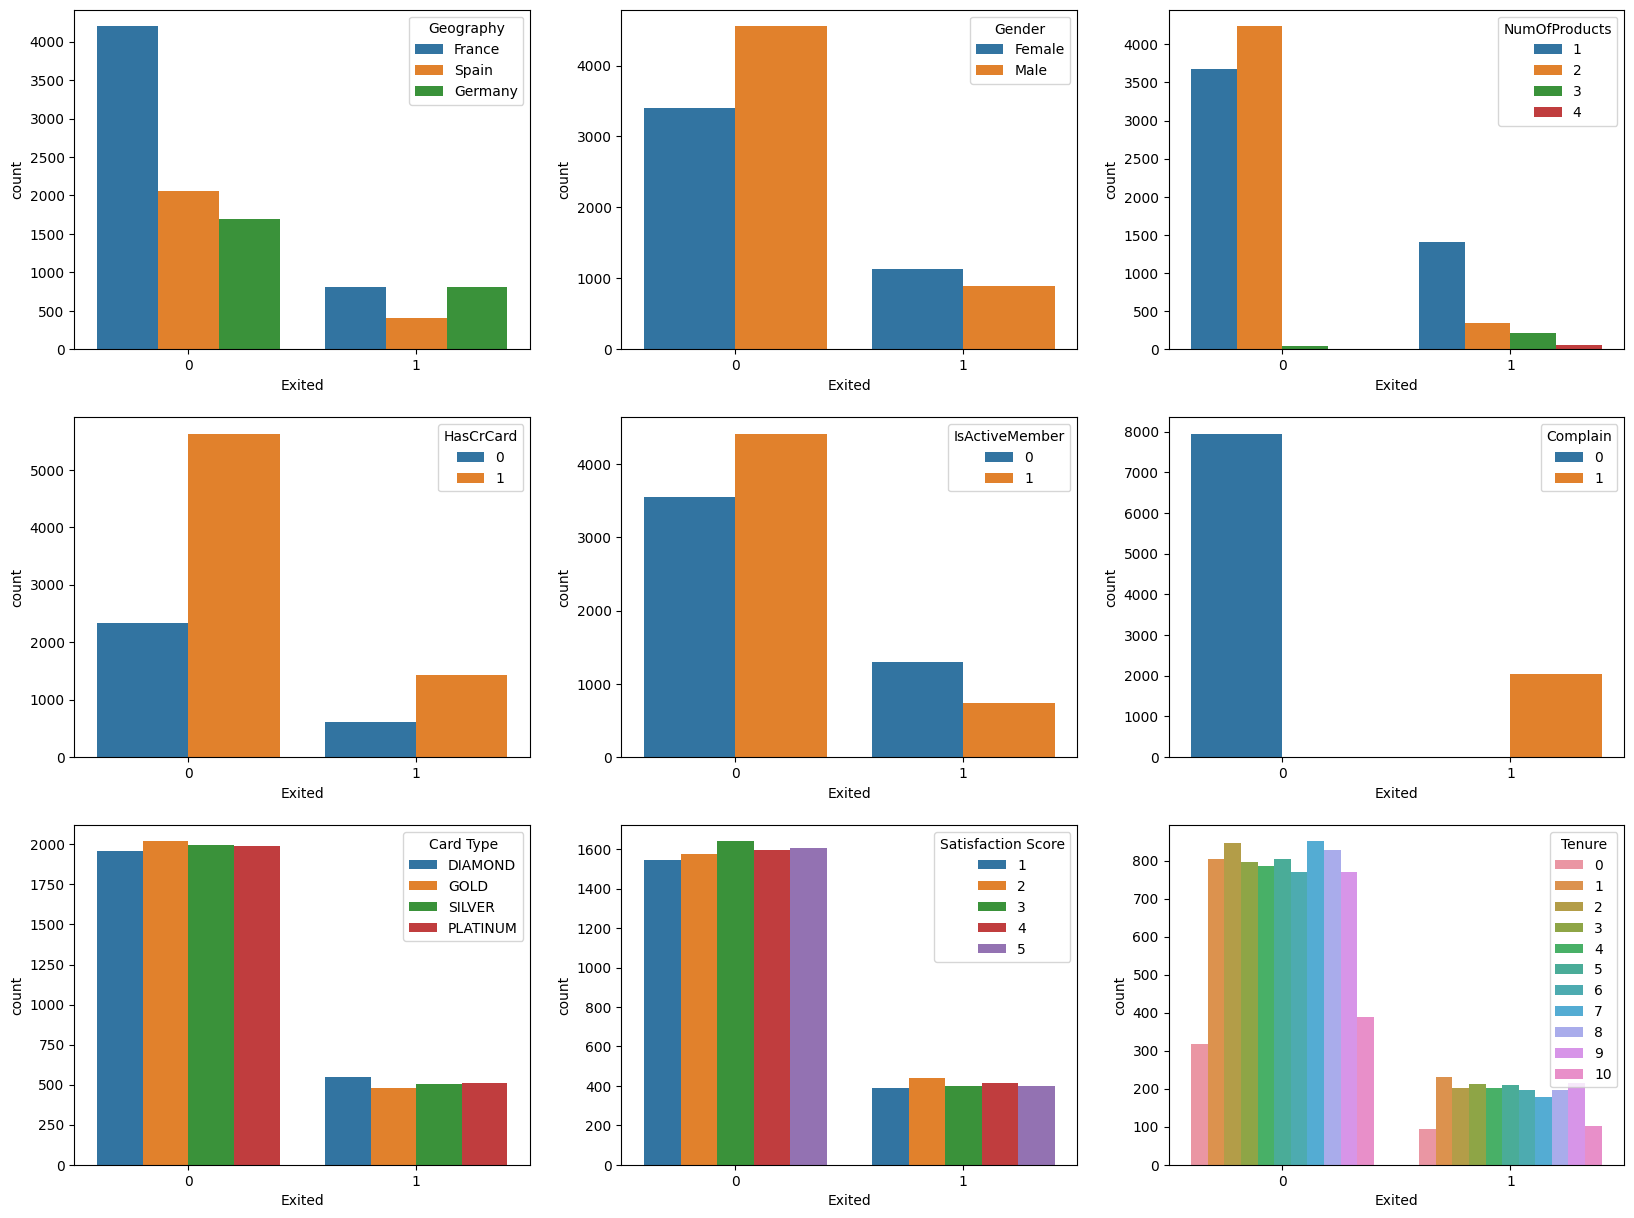

In [57]:
fig, axes = plt.subplots(3, 3, figsize = (20, 15))
sns.countplot ( ax = axes[0, 0], data = df, x = "Exited", hue = "Geography")
sns.countplot ( ax = axes[0, 1], data = df, x = "Exited", hue = "Gender")
sns.countplot ( ax = axes[0, 2], data = df, x = "Exited", hue = "NumOfProducts")
sns.countplot ( ax = axes[1, 0], data = df, x = "Exited", hue = "HasCrCard")
sns.countplot ( ax = axes[1, 1], data = df, x = "Exited", hue = "IsActiveMember")
sns.countplot ( ax = axes[1, 2], data = df, x = "Exited", hue = "Complain")
sns.countplot ( ax = axes[2, 0], data = df, x = "Exited", hue = "Card Type")
sns.countplot ( ax = axes[2, 1], data = df, x = "Exited", hue = "Satisfaction Score")
sns.countplot ( ax = axes[2, 2], data = df, x = "Exited", hue = "Tenure")
plt.show()

## Đồ thị biểu diễn mối liên quan giữa cột "Exit" và các cột chứa giá trị liên tục


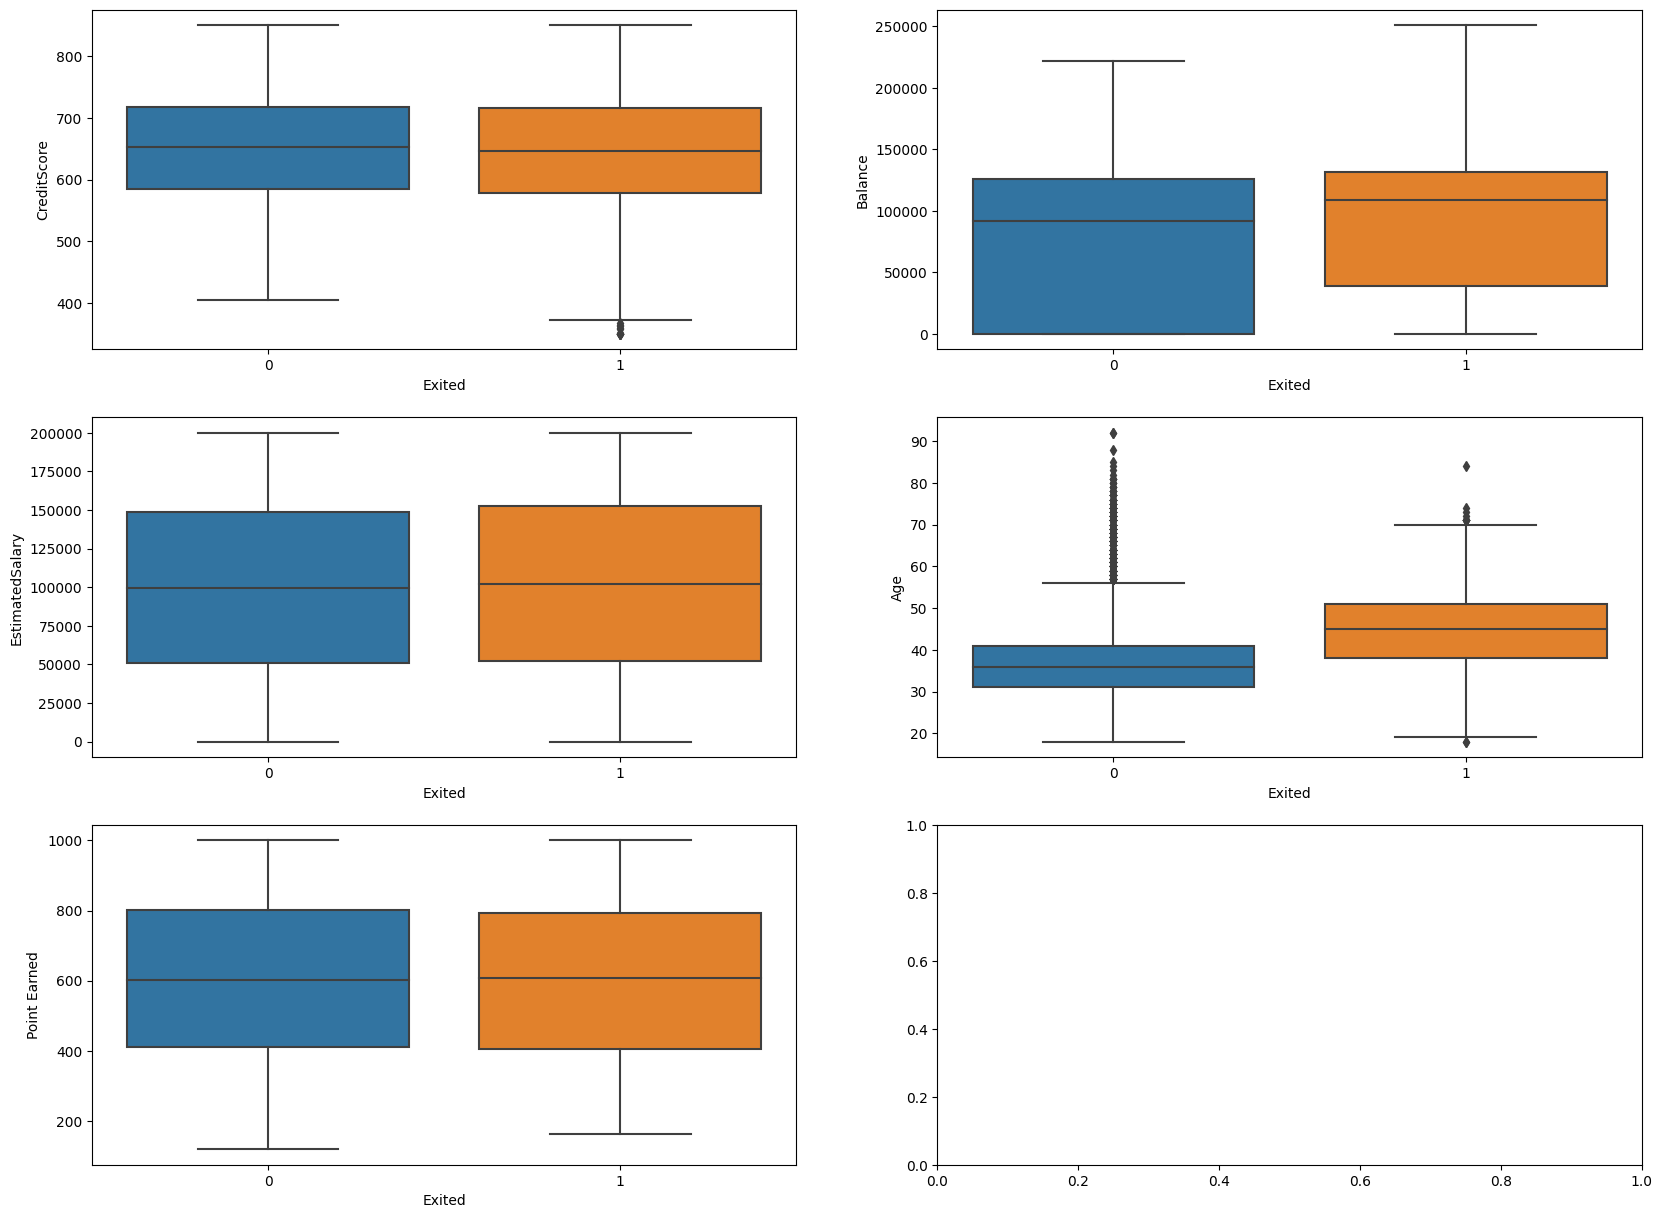

In [58]:
fig, axes = plt.subplots(3, 2, figsize = (20, 15))
sns.boxplot ( ax = axes[0, 0], data = df, x = "Exited", y = "CreditScore")
sns.boxplot ( ax = axes[0, 1], data = df, x = "Exited", y = "Balance")
sns.boxplot ( ax = axes[1, 0], data = df, x = "Exited", y = "EstimatedSalary")
sns.boxplot ( ax = axes[1, 1], data = df, x = "Exited", y = "Age")
sns.boxplot ( ax = axes[2, 0], data = df, x = "Exited", y = "Point Earned")
plt.show()

## Loại bỏ một số cột không cần thiết 

In [59]:
df.drop(columns=["Card Type", "Satisfaction Score", "Point Earned", "EstimatedSalary" ], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain
0,619.0,France,Female,42.0,2,0.00,1,1,1,1,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,0,1
2,502.0,France,Female,42.0,8,159660.80,3,1,0,1,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,0,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,0,0


# Data Transform 

In [60]:
## chuyển đổi dữ liệu
from sklearn.preprocessing import LabelEncoder

names = list(df.columns)
types = df.dtypes
le = LabelEncoder()
for i in range(len(types)):
  if types[i]=='object':
    le.fit_transform(df[names[i]])
    df[names[i]] = le.transform(df[names[i]])
    
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain
0,619.000000,0,0,42.0,2,0.000000,1,1,1,1,1
1,608.000000,2,0,41.0,1,83807.860000,1,0,1,0,1
2,502.000000,0,0,42.0,8,159660.800000,3,1,0,1,1
3,699.000000,0,0,39.0,1,0.000000,2,0,0,0,0
4,850.000000,2,0,43.0,2,125510.820000,1,1,1,0,0
5,645.000000,2,1,44.0,8,76430.201822,2,1,0,1,1
6,822.000000,0,1,50.0,7,0.000000,2,1,1,0,0
7,376.000000,1,0,29.0,4,115046.740000,4,1,0,1,1
8,501.000000,0,1,44.0,4,142051.070000,2,0,1,0,0
9,650.512505,0,1,27.0,2,134603.880000,1,1,1,0,0


## Lựa chọn dữ liệu

In [61]:
columns_to_select = df.columns[df.columns != 'Exited']
X = df.loc[:, columns_to_select]
y = df.iloc[:, df.columns.get_loc('Exited')]

#X.head()
y.head()
#print(X.shape)
#print(y.shape)

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Chuẩn hóa dữ liệu

In [62]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

for i in range (1, 10):
    print(X_scaled[i])



[0.516      1.         0.         0.31081081 0.1        0.33403148
 0.         0.         1.         1.        ]
[0.304      0.         0.         0.32432432 0.8        0.63635718
 0.66666667 1.         0.         1.        ]
[0.698      0.         0.         0.28378378 0.1        0.
 0.33333333 0.         0.         0.        ]
[1.         1.         0.         0.33783784 0.2        0.50024622
 0.         1.         1.         0.        ]
[0.59       1.         1.         0.35135135 0.8        0.30462648
 0.33333333 1.         0.         1.        ]
[0.944      0.         1.         0.43243243 0.7        0.
 0.33333333 1.         1.         0.        ]
[0.052      0.5        0.         0.14864865 0.4        0.45853972
 1.         1.         0.         1.        ]
[0.302      0.         1.         0.35135135 0.4        0.56617039
 0.33333333 0.         1.         0.        ]
[0.60102501 0.         1.         0.12162162 0.2        0.53648826
 0.         1.         1.         0.        ]

## Phân chia dữ liệu (Train = 80%, Test = 20%)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=  42)
print(len(X_train), len(X_test), len(y_train), len(y_test))


7000 3000 7000 3000


## Xây dựng Model cho thuật toán KNN và thực hiện đánh giá

K = 1, F1 = 0.9940119760479043, Precision = 0.9931623931623932, , Recall = 0.9948630136986302
K = 2, F1 = 0.9922746781115879, Precision = 0.9948364888123924, , Recall = 0.9897260273972602
K = 3, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
K = 4, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
K = 5, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
K = 6, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
K = 7, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
K = 8, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
K = 9, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768


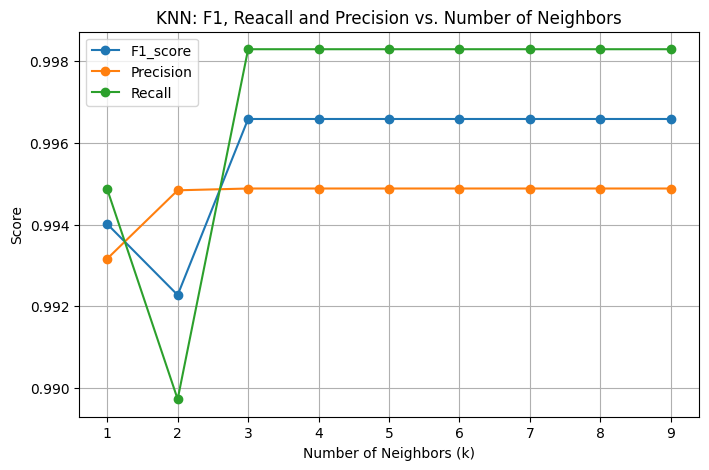

In [64]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
# Khởi tạo các danh sách để lưu giá trị
k_values = []
f1_scores = []
precision_scores = []
recall_scores = []

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    
    
    f1 = f1_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    
    
    print(f"K = {k}, F1 = {f1}, Precision = {precision}, , Recall = {recall}")

    # Lưu giá trị của k, accuracy score và precision score vào danh sách tương ứng
    k_values.append(k)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    


# Vẽ đồ thị
plt.figure(figsize=(8, 5))

plt.plot(k_values, f1_scores, marker='o', label='F1_score')
plt.plot(k_values, precision_scores, marker='o', label='Precision')
plt.plot(k_values, recall_scores, marker = 'o', label = 'Recall')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN: F1, Reacall and Precision vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()


## Xây dựng model cho thuật toán Decision Tree và thực hiện đánh giá 

K = 1, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768


K = 2, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
K = 3, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
K = 4, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
K = 5, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
K = 6, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
K = 7, F1 = 0.9931506849315068, Precision = 0.9931506849315068, , Recall = 0.9931506849315068
K = 8, F1 = 0.9948717948717949, Precision = 0.9931740614334471, , Recall = 0.9965753424657534
K = 9, F1 = 0.9940119760479043, Precision = 0.9931623931623932, , Recall = 0.9948630136986302


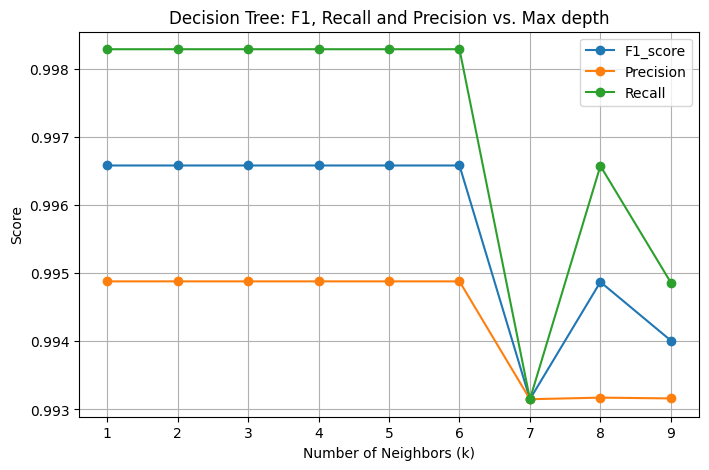

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score

# Khởi tạo các danh sách để lưu giá trị
depth_values = []
f1_scores = []
precision_scores = []
recall_scores = []

for depth in range(1, 10):
    reg = DecisionTreeClassifier(max_depth=depth, random_state=0)
    reg.fit(X_train, y_train)
    y_predict = reg.predict(X_test)
    
    f1 = f1_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)  
    
    print(f"K = {depth}, F1 = {f1}, Precision = {precision}, , Recall = {recall}")


    # Lưu giá trị của depth, f1 score và precision score vào danh sách tương ứng
    depth_values.append(depth)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Vẽ đồ thị
plt.figure(figsize=(8, 5))

plt.plot(depth_values, f1_scores, marker='o', label='F1_score')
plt.plot(depth_values, precision_scores, marker='o', label='Precision')
plt.plot(depth_values, recall_scores, marker = 'o', label = 'Recall')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Decision Tree: F1, Recall and Precision vs. Max depth')
plt.legend()
plt.grid(True)
plt.show()



## Xây dựng model cho thuật toán Logistic Regression và thực hiện đánh giá 

Max_iter = 100, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
Max_iter = 1000, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
Max_iter = 1500, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
Max_iter = 5000, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
Max_iter = 10000, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
Max_iter = 15000, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
Max_iter = 50000, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768
Max_iter = 100000, F1 = 0.9965811965811966, Precision = 0.9948805460750854, , Recall = 0.9982876712328768


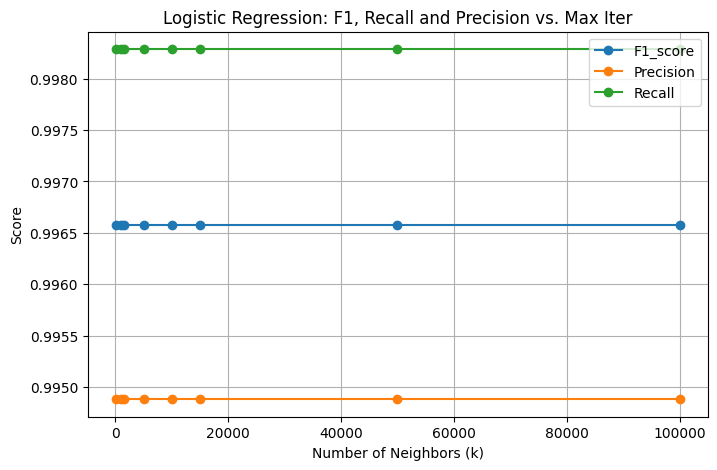

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

max_iters = [100, 1000, 1500, 5000, 10000, 15000, 50000, 100000]
f1_scores = []
precision_scores = []
recall_scores = []

for i in max_iters:
    model = LogisticRegression(max_iter=i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    
    f1 = f1_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)  
    
    print(f"Max_iter = {i}, F1 = {f1}, Precision = {precision}, , Recall = {recall}")
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Vẽ đồ thị
plt.figure(figsize=(8, 5))

plt.plot(max_iters, f1_scores, marker='o', label='F1_score')
plt.plot(max_iters, precision_scores, marker='o', label='Precision')
plt.plot(max_iters, recall_scores, marker = 'o', label = 'Recall')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Logistic Regression: F1, Recall and Precision vs. Max Iter')
plt.legend()
plt.grid(True)
plt.show()
    
